# Import the Libraries and Defining the Data

In [ ]:
import pandas as pd 
import matplotlib as plt

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly as px

In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding= 'unicode_escape')

# Checking and Understanding the Data

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

# Checking for NAN and Duplicates and Cleaning the Data

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.drop("ADDRESSLINE2", axis=1, inplace=True)

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.drop("STATE", axis=1, inplace=True)

In [ ]:
df.drop("POSTALCODE", axis=1, inplace=True)

In [ ]:
df.TERRITORY.nunique()

3

In [ ]:
df.groupby("TERRITORY").count()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
TERRITORY,,,,,,,,,,,,,,,,,,,,,
APAC,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
EMEA,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
Japan,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121


In [ ]:
df_NA = df[(df['TERRITORY'] != "EMEA") & (df['TERRITORY'] != "APAC") & (df['TERRITORY'] != "Japan")]

In [ ]:
df_NA.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,San Francisco,USA,NaN,Murphy,Julie,Small


In [ ]:
df.groupby("COUNTRY").count()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Australia,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
Austria,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
Belgium,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Canada,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,0,70,70,70
Denmark,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
Finland,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
France,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314
Germany,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
Ireland,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [ ]:
df.fillna("NA", inplace=True)

In [ ]:
df.groupby("TERRITORY").count()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
TERRITORY,,,,,,,,,,,,,,,,,,,,,
APAC,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
EMEA,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
Japan,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
NA,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074


In [ ]:
data = df.copy()

In [ ]:
df["TERRITORY"] = df["TERRITORY"].str.replace("Japan", "APAC")


In [ ]:
df.groupby("TERRITORY").count()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
TERRITORY,,,,,,,,,,,,,,,,,,,,,
APAC,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342
EMEA,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
NA,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074


In [ ]:
df.duplicated().values.any()

False

In [ ]:
df.isna().values.any()

False

### We Dropped the columns that we will not use, and we fixed and filled the columns that contained nan values. 

# Data Visualization and Analysis

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,NA,Brown,Julie,Medium


In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

### Analysis of the product Line

**products that was most sold**

In [ ]:
product_line = df.groupby("PRODUCTLINE").count()

<BarContainer object of 7 artists>

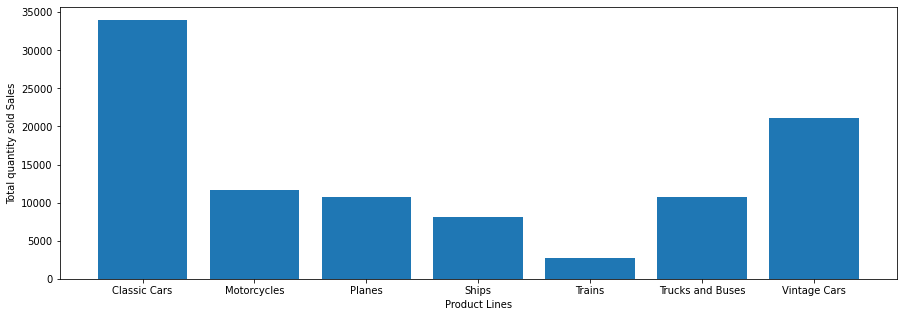

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.xlabel("Product Lines")
plt.ylabel("Total quantity sold Sales")
plt.bar(product_line.index, height=product_line_sales.QUANTITYORDERED)

**Products that yeilded profits**

In [ ]:
product_line_sales= df.groupby("PRODUCTLINE").sum()

In [ ]:
product_line_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
PRODUCTLINE,,,,,,,,,
Classic Cars,9918937,33992,84453.70,6233,3919615.66,2684,7003,1937661,115929
Motorcycles,3395505,11663,27472.19,1963,1166388.34,884,2275,663273,32130
Planes,3142556,10727,25012.72,2210,975003.57,800,2081,613199,27163
Ships,2399856,8127,19622.18,1591,714437.13,619,1622,468893,20154
Trains,789654,2712,5825.41,550,226243.47,209,549,154292,5620
Trucks and Buses,3087894,10777,26345.91,1873,1127789.84,837,2210,603143,30842
Vintage Cars,6225979,21069,47435.96,3834,1903150.84,1639,4282,1216309,52482


<BarContainer object of 7 artists>

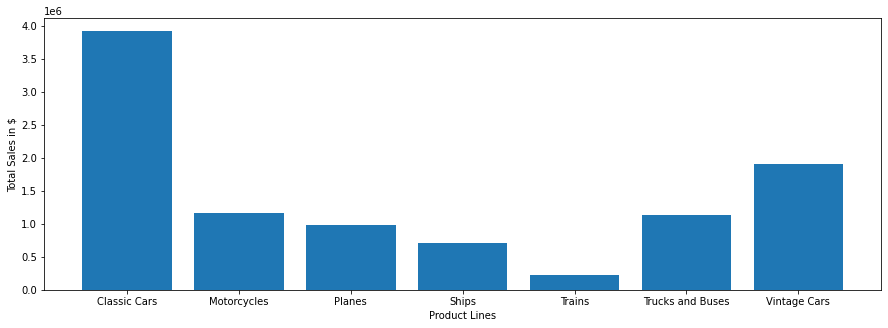

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.xlabel("Product Lines")
plt.ylabel("Total Sales in $")
plt.bar(product_line_sales.index, height=product_line_sales.SALES)

### Analysis by Country, Top 10 with the highest sales, top 10 highest quantity ordered

**top 10 highest by quantity ordered**

In [ ]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,NA,Brown,Julie,Medium


In [ ]:
top_sales_by_country = df.groupby("COUNTRY").sum().sort_values(by="SALES", ascending=False).head(10)

<BarContainer object of 10 artists>

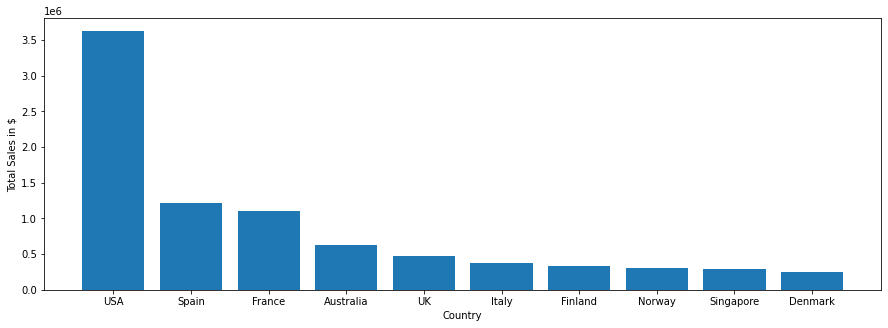

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Country")
plt.ylabel("Total Sales in $")
plt.bar(top_sales_by_country.index, height=top_sales_by_country.SALES)

**top 10 highest by sales**

In [ ]:
top_quantity_ordered_by_country = df.groupby("COUNTRY").sum().sort_values(by="QUANTITYORDERED", ascending=False).head(10)

<BarContainer object of 10 artists>

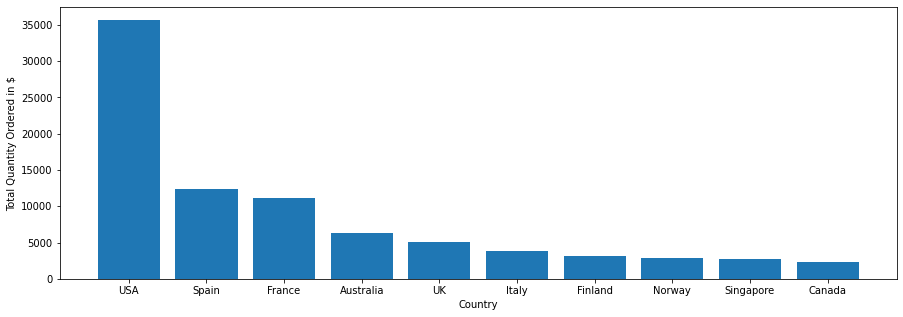

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Country")
plt.ylabel("Total Quantity Ordered in $")
plt.bar(top_quantity_ordered_by_country.index, height=top_quantity_ordered_by_country.QUANTITYORDERED)

### Product Line by Country in Sales and Quantity Ordered

**Product line by country in quantity ordered**

In [ ]:
country_product_line = df.groupby(["COUNTRY", "PRODUCTLINE"])["QUANTITYORDERED"].sum()

In [ ]:
country_product_line

COUNTRY    PRODUCTLINE     
Australia  Classic Cars        1818
           Motorcycles          876
           Planes               813
           Ships                 56
           Trains                33
                               ... 
USA        Planes              3476
           Ships               2395
           Trains               912
           Trucks and Buses    3932
           Vintage Cars        8239
Name: QUANTITYORDERED, Length: 116, dtype: int64

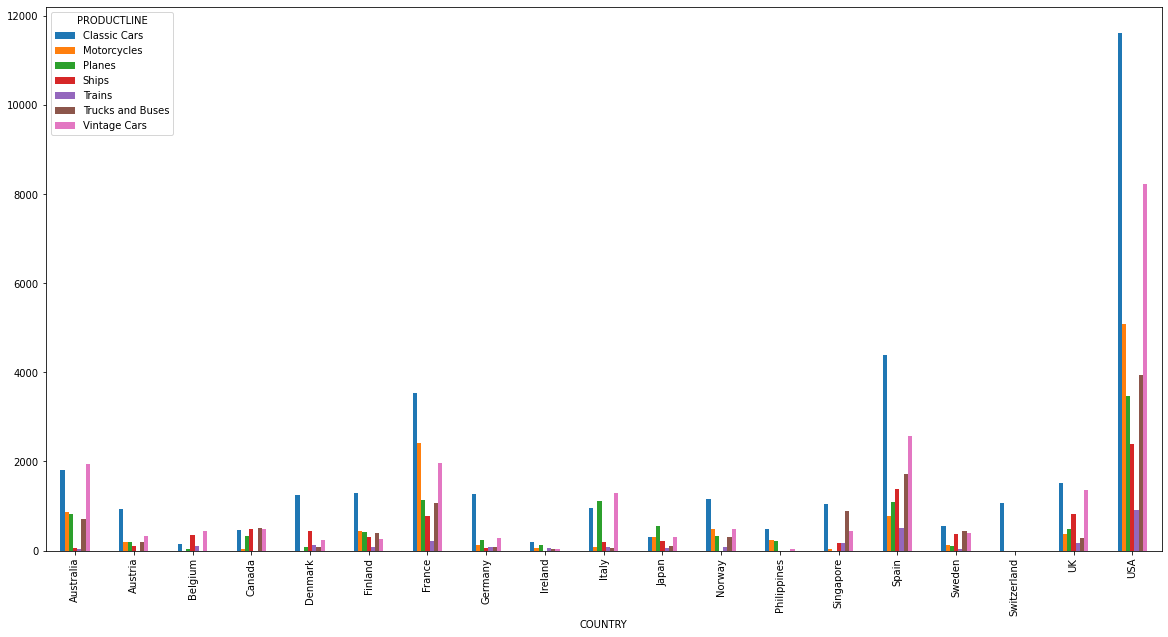

In [ ]:
country_product_line.unstack().plot(kind='bar', figsize=(20, 10))



**Product line by country in Sales**

In [ ]:
country_product_line_sales = df.groupby(["COUNTRY", "PRODUCTLINE"])["SALES"].sum()

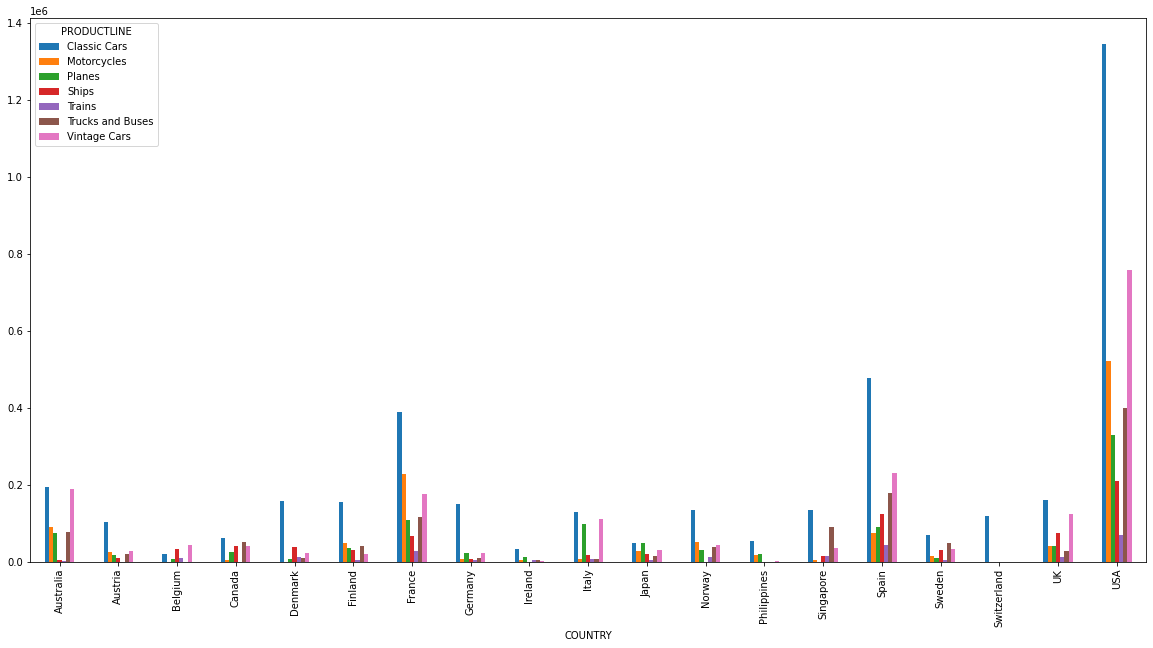

In [ ]:
country_product_line_sales.unstack().plot(kind='bar', figsize=(20, 10))

### ORDER LINE NUMBER Analysis

In [ ]:
df.ORDERLINENUMBER.nunique()

18

In [ ]:
orderline_by_country = df.groupby(["ORDERLINENUMBER", "COUNTRY"])["MONTH_ID"].count()

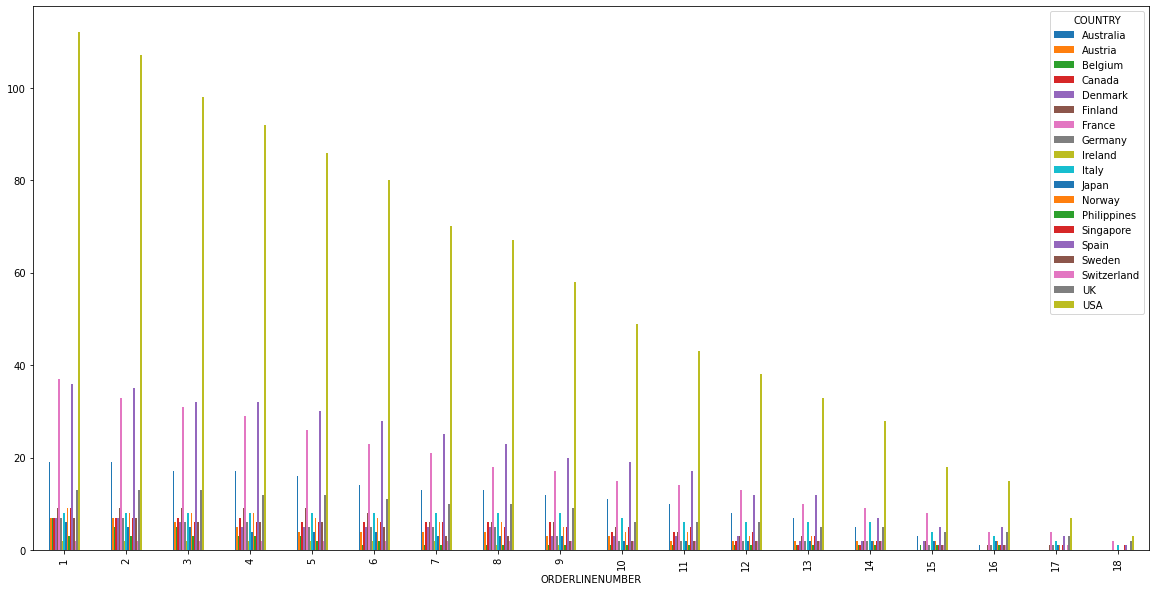

In [ ]:
orderline_by_country.unstack().plot(kind='bar', figsize=(20, 10))

### Analysis of sales by day, month and year

**by Year**

In [ ]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small


In [ ]:
df.groupby("YEAR_ID").sum()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,MSRP
YEAR_ID,,,,,,,,
2003,10158099,34612,83793.14,6709,3516979.54,3102,8243,101589
2004,13834764,46824,112488.10,8690,4724162.60,3916,10344,134851
2005,4967518,17631,39886.83,2855,1791486.71,654,1435,47880


Text(0.5, 1.0, 'Share of Sales per Each Year')

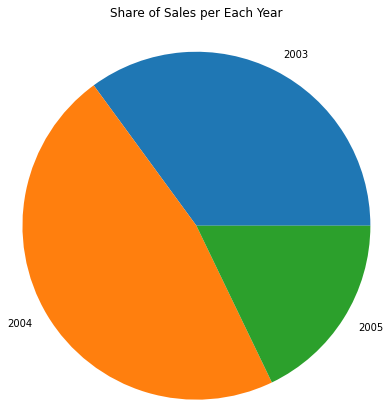

In [ ]:
plt.pie(x=df.groupby("YEAR_ID").sum().SALES, labels=df.groupby("YEAR_ID").sum().index, radius=2)
plt.title("Share of Sales per Each Year", loc="center", pad=100)

*2005 does not have enough of data but I included it.*

***By Month***

In [ ]:
df.groupby("MONTH_ID").sum()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,YEAR_ID,MSRP
MONTH_ID,,,,,,,,
1,2349698,7997,19111.78,1510,785874.44,229,458976,23081
2,2300254,7903,18902.49,1435,810441.90,224,448952,22680
3,2179852,7585,17432.61,1355,754501.39,212,424904,20883
4,1824713,6704,14763.28,965,669390.96,356,356710,17378
5,2595661,8992,21137.41,1555,923972.56,504,505070,25658
6,1337996,4620,10873.51,763,454756.78,262,262478,13001
7,1441499,4899,12105.77,905,514875.97,423,282514,14686
8,1955772,6538,15974.11,1426,659310.57,573,382706,19256
9,1749237,5681,14277.88,1026,584724.27,513,342608,17245


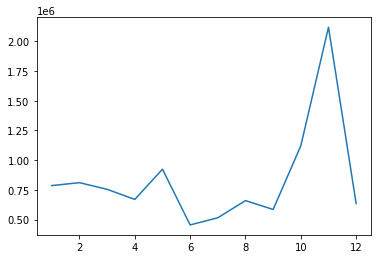

In [ ]:
plt.plot(df.groupby("MONTH_ID").sum().index, df.groupby("MONTH_ID").sum().SALES)

**by month in each year**

In [ ]:
data_03 = df[df["YEAR_ID"] == 2003]
data_04 = df[df["YEAR_ID"] == 2004]
data_05 = df[df["YEAR_ID"] == 2005]

In [ ]:
best_month_2003 = data_03.groupby("MONTH_ID").sum()
best_month_2004 = data_04.groupby("MONTH_ID").sum()
best_month_2005 = data_05.groupby("MONTH_ID").sum()

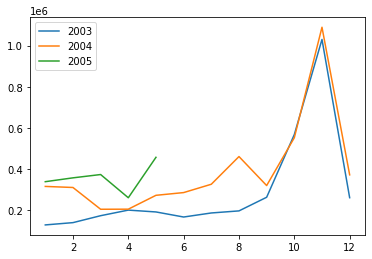

In [ ]:
plt.plot(best_month_2003.index, best_month_2003.SALES, label = "2003")
plt.plot(best_month_2004.index, best_month_2004.SALES, label = "2004")
plt.plot(best_month_2005.index, best_month_2005.SALES, label = "2005")

plt.legend()
plt.show()

**Analyse Sales each month per year for the first 5 months only, because we cannot 2005 data for june and more is not available**

In [ ]:
best_month_2003 = data_03.groupby("MONTH_ID").sum().head(5)
best_month_2004 = data_04.groupby("MONTH_ID").sum().head(5)

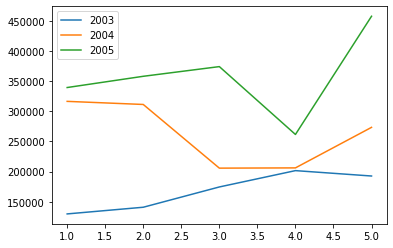

In [ ]:
plt.plot(best_month_2003.index, best_month_2003.SALES, label = "2003")
plt.plot(best_month_2004.index, best_month_2004.SALES, label = "2004")
plt.plot(best_month_2005.index, best_month_2005.SALES, label = "2005")

plt.legend()
plt.show()

*NB: we Analyse that in 2005 the company is doing much better than the 2 previous years in sales.*

**By Day**

In [ ]:
df.ORDERDATE = df.ORDERDATE.str.replace(" 0:00", "")

In [ ]:
df.ORDERDATE = pd.to_datetime(df.ORDERDATE)

In [ ]:
df["Day"] = df.ORDERDATE.dt.day_name()


In [ ]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Day
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NA,Yu,Kwai,Small,Monday
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small,Wednesday


In [ ]:
data_03 = df[df["YEAR_ID"] == 2003]
data_04 = df[df["YEAR_ID"] == 2004]
data_05 = df[df["YEAR_ID"] == 2005]

In [ ]:
best_day_2003 = data_03.groupby("Day").sum()
best_day_2004 = data_04.groupby("Day").sum()
best_day_2005 = data_05.groupby("Day").sum()

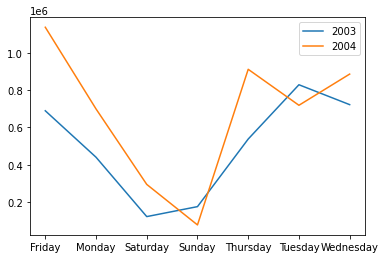

In [ ]:
plt.plot(best_day_2003.index, best_day_2003.SALES, label = "2003")
plt.plot(best_day_2004.index, best_day_2004.SALES, label = "2004")


plt.legend()
plt.show()

In [ ]:
df.groupby("Day").sum().sort_values(by="SALES", ascending=False)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
Day,,,,,,,,,
Friday,6134727,20870,50565.94,3902,2140653.80,1763,4596,1198264,60268
Thursday,5525316,18905,45193.41,3463,1947412.20,1366,3544,1078123,54997
Wednesday,5765645,19598,46399.32,3597,1947146.04,1570,4135,1126135,56082
Tuesday,5278336,18257,43242.12,3458,1900773.29,1353,3603,1031935,52627
Monday,3748846,12756,30456.77,2336,1254535.03,909,2307,733373,36238
Sunday,1244546,4320,10157.56,793,421781.56,295,752,242482,12220
Saturday,1262965,4361,10152.95,705,420326.93,416,1085,246458,11888


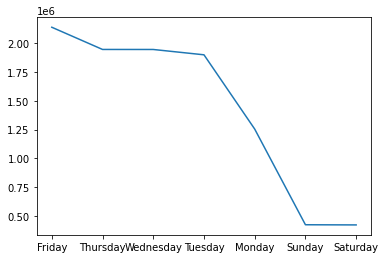

In [ ]:
plt.plot(df.groupby("Day").sum().sort_values(by="SALES", ascending=False).index, df.groupby("Day").sum().sort_values(by="SALES", ascending=False).SALES, label = "2003")

### DEAL SIZE ANALYSIS

**DEAL SIZE BY COUNTRY, DEAL SIZER BY TERRITORY**

**BY COUNTRY**

In [ ]:
df.groupby(["DEALSIZE", "COUNTRY"])["SALES"].sum()

DEALSIZE  COUNTRY    
Large     Australia        60252.04
          Austria          32792.08
          Canada            9064.89
          Denmark          49886.67
          Finland          40012.32
          France          179004.87
          Germany          30496.06
          Ireland          15439.44
          Italy            57565.43
          Japan            25470.16
          Norway           41042.70
          Philippines       7483.98
          Singapore        35363.19
          Spain           141042.51
          Sweden           14345.30
          UK               35155.24
          USA             527702.38
Medium    Australia       381245.00
          Austria         125314.10
          Belgium          71531.37
          Canada          137430.48
          Denmark         140050.70
          Finland         201741.96
          France          643606.22
          Germany         133151.79
          Ireland          26822.87
          Italy           184133.88
      

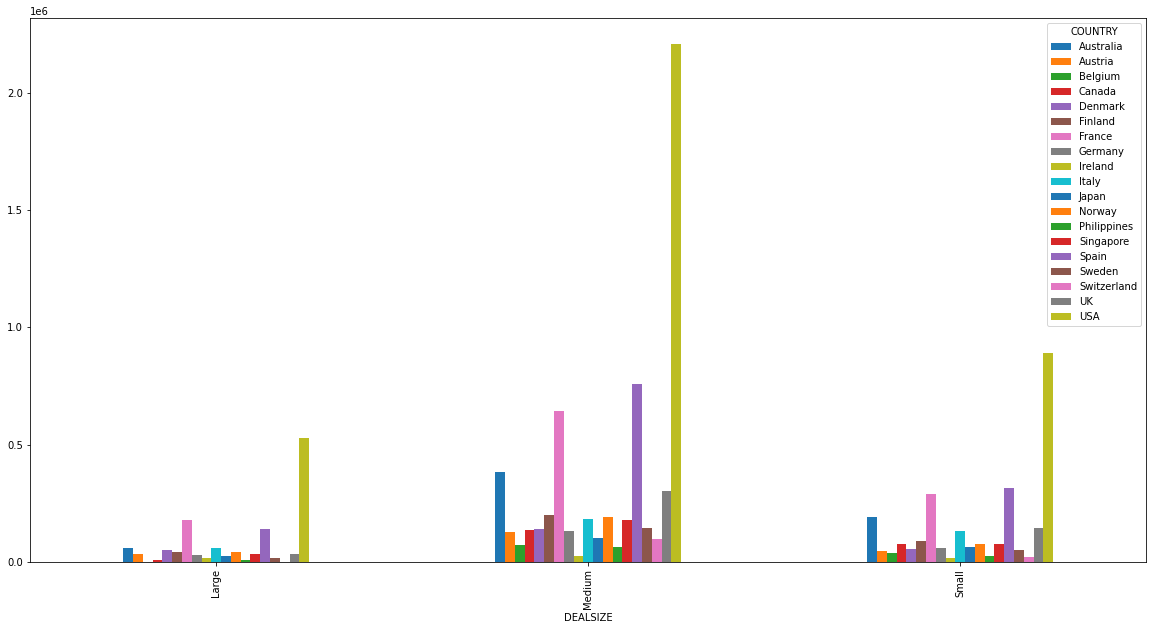

In [ ]:
df.groupby(["DEALSIZE", "COUNTRY"])["SALES"].sum().unstack().plot(kind='bar', figsize=(20, 10))

BY TERRITORY

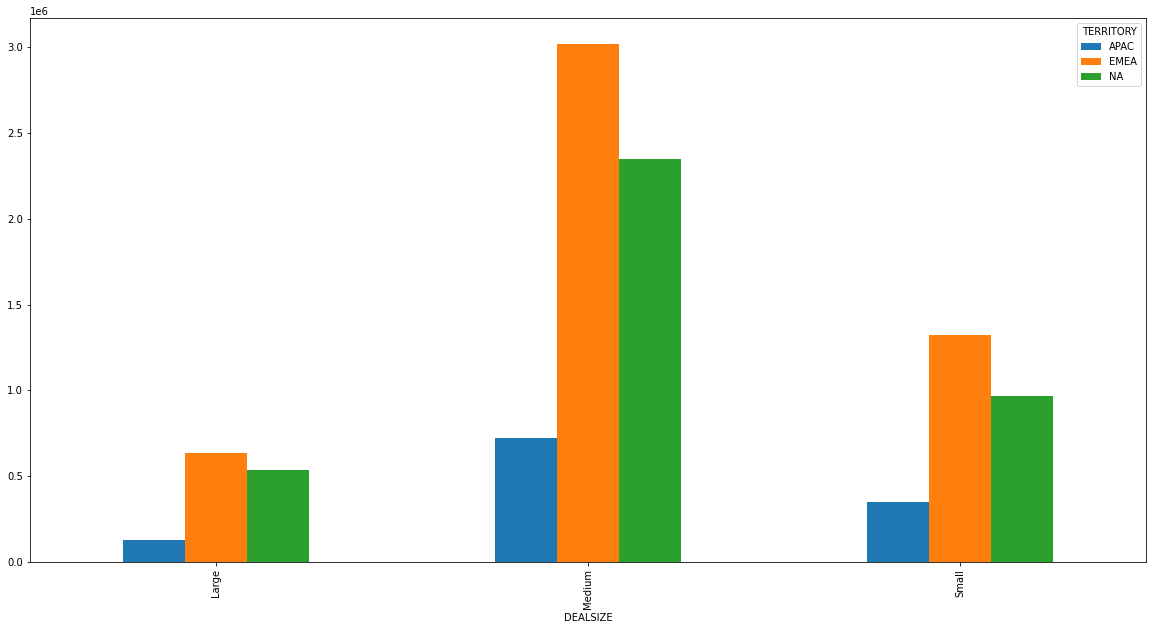

In [ ]:
df.groupby(["DEALSIZE", "TERRITORY"])["SALES"].sum().unstack().plot(kind='bar', figsize=(20, 10))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')